# Data Wrangling and EDA

## Introduction

The West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person 
when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of 
traps that they place around the city. They are then able to study the captured specimens and monitor the state of 
WNV spread in the city.

In this notebook, data from 2008 to 2019 I'll perform some basic EDA and Data Wrangling to get familiar with the dataset from the city of Chicago. 

### Data Wrangling

First, the data needs to be cleaned/analysed to determine what the state of the data is in. To do this certain libraries need to imported.

### Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import utils

%matplotlib inline

In [62]:
#Read the dataset in
df = pd.read_csv('Data.csv')

I can now conduct some basic data analysis of the dataframe with the use of my utils library function. 

In [63]:
utils.eda(df)


Rows: 18495 	 Columns: 13

Total null rows: 5848
Percentage null rows: 31.62%

Total duplicate rows: 862
Percentage dupe rows: 4.66%

Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object
-----


The head of the dataframe is: 


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049



The tail of the dataframe is:


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN



Description of the numerical columns is as follows


,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


From this command, there are some columns of the data which have datatypes that do not correspond with the column names. The date is a string object, also the year and week are int64 when it could be a datatime datatype.

The shape function then outputs a value for the shape of the df dataframe, it has 13 columns and 18495 rows. Of these rows there are 5848 null rows which need to be analysed in more detial.

As noted earlier, there are certain columns which have datatypes which don't match the name. For example, the date column is a string when it could be a datetime data type. First the column needs to be analysed to determine what state the data is in. From the head, it seems that the times and dates are all the same.

In [64]:
df['Date'].head(10)

0    2019-09-26 00:09:00
1    2019-09-26 00:09:00
2    2019-09-26 00:09:00
3    2019-09-26 00:09:00
4    2019-09-26 00:09:00
5    2019-09-26 00:09:00
6    2019-09-26 00:09:00
7    2019-09-26 00:09:00
8    2019-09-26 00:09:00
9    2019-09-26 00:09:00
Name: Date, dtype: object

In [65]:
df['Date'].tail(10)

18485    2018-08-16 00:08:00
18486    2016-07-21 00:07:00
18487    2007-08-22 00:08:00
18488    2017-07-27 00:07:00
18489    2013-08-29 00:08:00
18490    2016-09-09 00:09:00
18491    2007-08-24 00:08:00
18492    2016-07-27 00:07:00
18493    2017-08-17 00:08:00
18494    2015-08-20 00:08:00
Name: Date, dtype: object

After looking at the tail data it is clear that the values do differ so there is no need for a split function, as previously assumed. With the help of the astype function, the date column can be converted to a datetime datatype. 

In [66]:
df['Date'] = df['Date'].astype('datetime64')

In [67]:
#Sanity Check
df['Date'].head(5)

0   2019-09-26 00:09:00
1   2019-09-26 00:09:00
2   2019-09-26 00:09:00
3   2019-09-26 00:09:00
4   2019-09-26 00:09:00
Name: Date, dtype: datetime64[ns]

In my basic EDA of the dataframe earlier, I found that there were null values. I want to explore what those null values so I can determine whether I want to impute the values or drop them completely. 

In [68]:
df.isna().mean()*100

Year                0.000000
Week                0.000000
Address Block       0.000000
Block               0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
Mosquito ID         0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

From the results above, it can be seen that there both the Latitude and Longitude columns contain 15.8% of null values. This is too large a value for me to drop the rows completely as it is will affect the integrity of the data and insights. I will impute the null values with the correct values, but first I need to find the correct values to impute. By plotting the two column data, I can get an idea of what each column holds. 

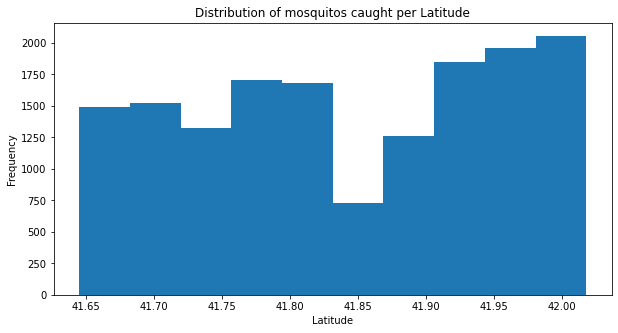

In [69]:
plt.figure(figsize = (10,5))
df['Lat'].plot(kind = 'hist')
plt.title('Distribution of mosquitos caught per Latitude')
plt.xlabel('Latitude')
plt.show()

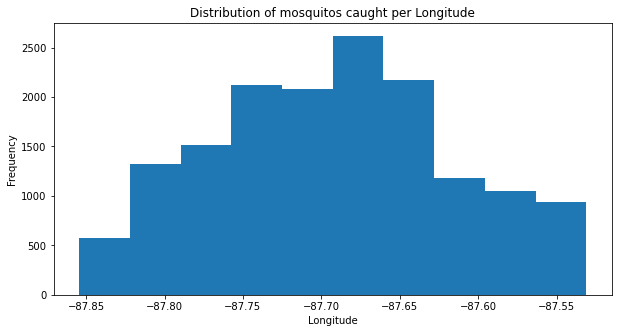

In [70]:
plt.figure(figsize = (10,5))
df["Lon"].plot(kind = 'hist')
plt.title('Distribution of mosquitos caught per Longitude')
plt.xlabel('Longitude')
plt.show()

From both the distributions and the describe command it is evident that the latitude and longitudes vary a small amount. Only 0.5 for latitude and 0.3 for longitude. Demonstrating that the location of the traps which were set were concentrated within a specific area. The longitude is distributed normally with a large frequency of traps being set around -87.7. However, the latitude was distributed very differently with the frequency spread quite widely. This would demonstrate that in terms of east to west the distribution of traps varied very little with it concentrated within the area of -87.7. However, the latitude in terms of north to south varied more with more traps being set along the range of 41.6 and 42. 

I initially wanted to impute the values with the mean of the whole Lat and Lon column. However, given that this was location data that is very data etiquette. I will find the address values and impute it for each specific address. 

In [71]:
all(df['Lon'].isna() == df['Lat'].isna())

True

The above code is to check that where there are missing values for the latitude there are missing values for the longitude. The all function returns True if all the lat and lon values match each other or false if they do not. In this case they all match each other which means that whenever we input the lat values then we can input the lon values as well. 

In [72]:
null_cols = df['Lat'].isna()
address_totals = df[null_cols]['Address Block'].value_counts()
address_totals
for x in address_totals.index:
    print(x)

100XX W OHARE AIRPORT
4XX W 127TH
100XX W OHARE
79XX S CHICAGO
81XX S ASHLAND
115XX S AVENUE L
65XX N OAK PARK AVE
30XX S HOYNE
98XX S AVENUE G
43XX N ASHLAND


Firstly, the above code goes through the Lat column and returns true or false for each row if there is a null value or not. It then groups all the addresses with the null values, with this information I can create a dictionary that can loop through the dictionary with the specific lat and lon value for each address. Then I can loop through the dataframe and when there is a null value, I can match the address with the one in the dictionary and impute the lat/lon values.

In [73]:
address_dictionary = {'100XX W OHARE AIRPORT': [41.978611,-87.904724],
 '4XX W 127TH': [41.663278,-87.633214],
 '100XX W OHARE': [41.978611,-87.904724] ,
 '79XX S CHICAGO': [42.2650026,-87.0639159],
 '81XX S ASHLAND': [41.870436,-87.665853],
 '115XX S AVENUE L': [41.697376, -87.528177],
 '65XX N OAK PARK AVE': [41.935567,-87.795257],
 '30XX S HOYNE': [41.833866,-87.678173],
 '98XX S AVENUE G': [41.709293,-87.5315843],
 '43XX N ASHLAND': [41.882612,-87.667027]}

In [74]:
for address in address_dictionary.keys():
    df.loc[df["Address Block"] == address, 'Lat'] = address_dictionary[address][0]
           
for address in address_dictionary.keys():
    df.loc[df["Address Block"] == address, 'Lon'] = address_dictionary[address][1]
    
df.head(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.978611,-87.904724
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.921777,-87.632140
6,2019,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2019-09-26 00:09:00,3,Res,negative,CULEX RESTUANS,41.866915,-87.654919
7,2019,39,22XX W 51ST ST,22,T061,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.801048,-87.680425
8,2019,39,22XX N CANNON DR,22,T054A,GRAVID,2019-09-26 00:09:00,1,Ter,negative,CULEX TERRITANS,41.922737,-87.632450
9,2019,39,3XX W 104TH ST,3,T095,GRAVID,2019-09-26 00:09:00,1,Sal,negative,CULEX SALINARIUS,41.705328,-87.632955


My method was to loop through the keys address dictionary I created with all the addresses that had null values. If the address in the dataframe matched the address in the address_dictionary it imputed the the lat and lon values. Although this meant that it imputed values which may not have had null values for that specific address, this seemed like the easiest option. I then did a sanity check below to ensure that there were no more null values in the dataframe. 

In [75]:
#Sanity Check
df.isna().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

I finally want to determine if there were any redundant columns in the dataframe that could be removed. I identified there were four columns that could be repeating the same information in its columns - Address Block, Block, Mosquito ID and Species. I want to explore this further.

In [76]:
df[['Address Block','Block']]

,Address Block,Block
0,100XX W OHARE AIRPORT,100
1,52XX S KOLMAR AVE,52
2,58XX N WESTERN AVE,58
3,39XX N SPRINGFIELD AVE,39
4,131XX S BRANDON AVE,131
...,...,...
18490,3XX W 18TH ST,3
18491,46XX N MILWAUKEE AVE,46
18492,127XX S DOTY AVE,127
18493,20XX N DOMINICK ST,20


In [77]:
df[['Mosquito ID','Species']]

,Mosquito ID,Species
0,Res,CULEX RESTUANS
1,Res,CULEX RESTUANS
2,Res,CULEX RESTUANS
3,Res,CULEX RESTUANS
4,Res,CULEX RESTUANS
...,...,...
18490,Pip,CULEX PIPIENS
18491,Pip,CULEX PIPIENS
18492,Res,CULEX RESTUANS
18493,Res,CULEX RESTUANS


Looking at the code above it is clear to see that the block column is redundant. It is repeating the same values as in the address block so can be removed which is done with the code below. Also, the Mosquito ID and Species are repeating the same information. The Mosquito ID column is just a shorthand of the species column. 

In [78]:
df = df.drop('Block', axis=1)
df = df.drop('Mosquito ID', axis=1)

### Exploratory Data Analysis (EDA)

Now that I have dealt with the null data and cleaned it, the next step is to start performing EDA and visualising any insights in the data. 

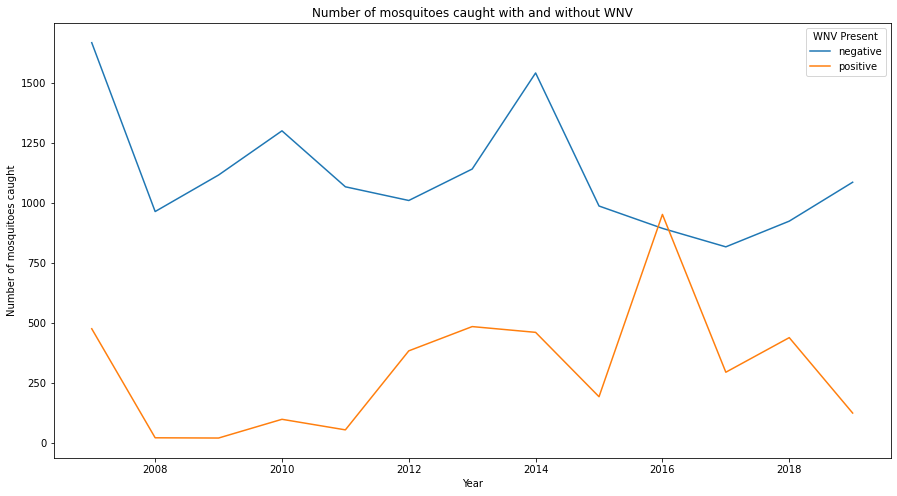

In [79]:
df.groupby('Year')['WNV Present'].value_counts().unstack().plot(kind="line",figsize = (15,8))
plt.title("Number of mosquitoes caught with and without WNV")
plt.ylabel("Number of mosquitoes caught")
plt.xlabel("Year")
plt.show()

From the line graphs above, it demonstrates the presence of WNV for each year. From the plot, it is clear to see that there was a massive spike up in 2016. This was due to higher temperatures and more favourable environmental conditions for mosquitos. From the trend of the two graphs it can be seen that there is a positive trend for the positive presence of WNV and vice versa for negative. With climate change increasing temperatures and producing environments more favourable for mosquitos this explains the rise. Furthermore, CULEX mosquitos enjoy urban conditions and with increased urbanisation of chicago more mosquitos are being attracted to the area. 

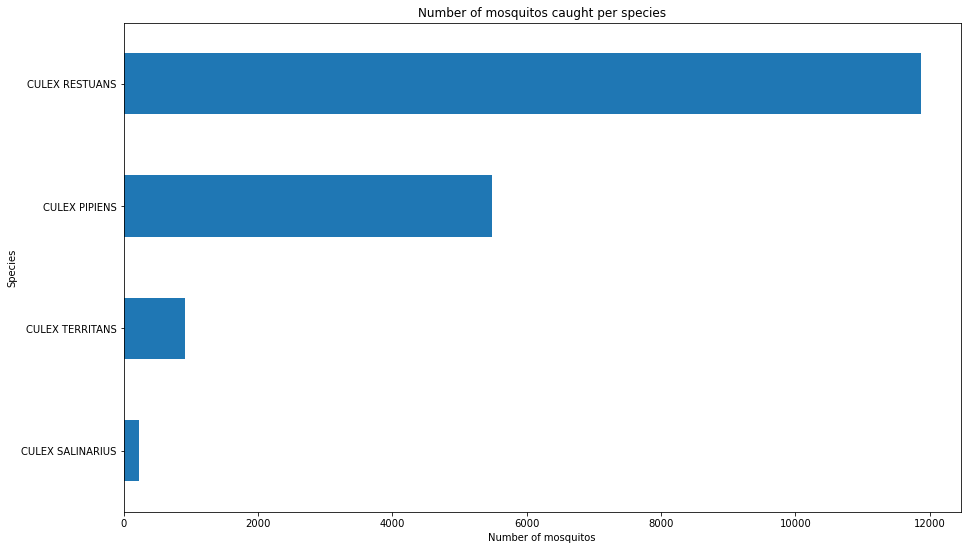

In [80]:
df['Species'].value_counts().sort_values().plot(kind="barh", figsize= (15,9))
plt.title('Number of mosquitos caught per species')
plt.xlabel('Number of mosquitos')
plt.ylabel('Species')
plt.show()

There were four types of mosquito species that were captured. It can be seen that they are all part of the Culex family but different sub-species. From my research it was found that Culex mosquitoes are common throughout much of North America. Each Culex species is sensitive to both natural and human-influenced environmental factors, especially climate and land cover type. Some prefer urban environments instead of rural ones, and some are limited to tropical or humid areas. With the bar chart data at hand, the Culex Restuans is the most prevalent species caught in trap types, due to the fact that the urban conditions of Chicago are preferred by this species. From the bar chart it can be assumed that the primary species that spreads WNV is from the Culex family. It is worth noting that this data demonstrates that only one sub-species were caught per trap, which is something to question because the likelihood that a specific trap captures only one species and not the other seems highly inprobable. 

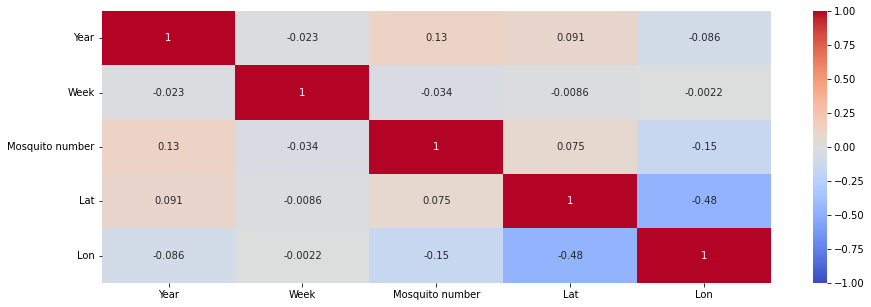

In [81]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0, annot = True)
plt.show()

Looking at the correlation plot, as expected the Lat and Lon column are highly correlated with each other. But apart from that no other columns correlate that strongly with each other which will be incredibly beneficial for next steps when conducting machine learning models.

I wanted to explore the relationship between mosquito number and the date I used certain viusals. With the help of the code below I can visualise this.

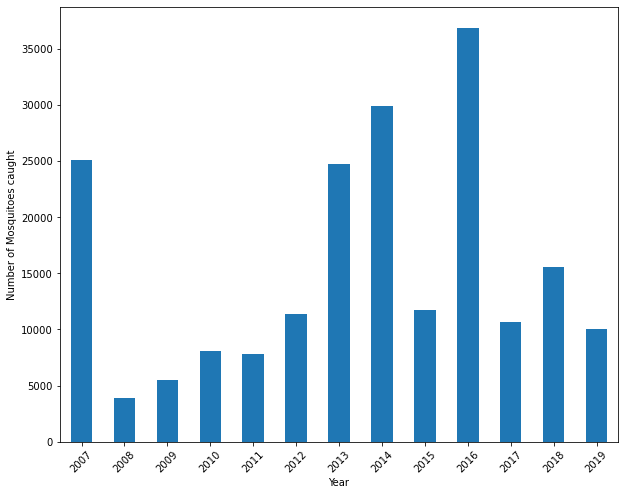

In [82]:
df.groupby(["Year"])["Mosquito number"].sum().plot(kind = 'bar', figsize = (10,8))
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Number of Mosquitoes caught")
plt.show()

As demonstrated by the plot above and the correlation plot there is a small positive correlation between year and number of mosquitoes, implying that as the years went by there was a slight increase in number of mosquitoes. Which could be attributed to global warming. 

I want to explore the relationship further to see if there is a relationship between the month and the mosquitoes that are caught.

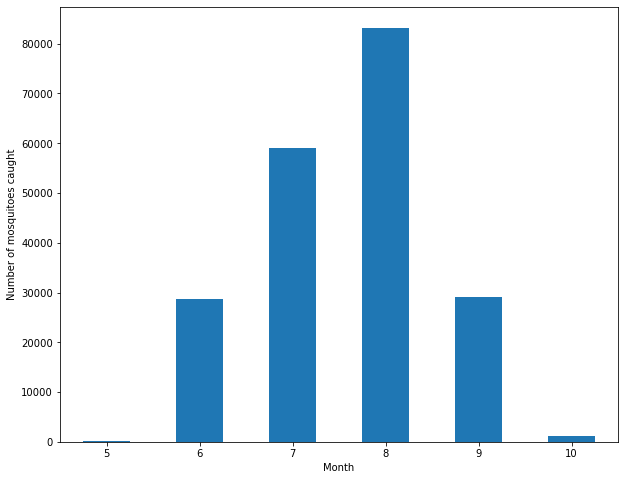

In [83]:
df['Month'] = df['Date'].dt.month
df.groupby(["Month"])["Mosquito number"].sum().plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of mosquitoes caught")
plt.xticks(rotation =0)
plt.xlabel("Month")
plt.show()

In [84]:
corr1 = df['Month'].corr(df['Mosquito number'])
print(corr1)

-0.040426437196600794


From the plots it is clear to see that there was a massive drop between 2007 and 2008. Environmental variables such as temperature, relative humidity and precipitation are known to impact mosquito activity, survival and distribution. From my research this was due to lower average temperatures which meant there were less mosquitos about. With 2016 being a hotter year compared to subsequent years, this explained the rise in numberes. However, there is a correlation between higher temperatures and the prevalence of mosquitos as demonstrated in the second bar chart describing months. In August there were a large number of mosquitos caught in the trap which follows trends, below 10 degrees celsius mosquitos are no longer present which supports the data for October where the number which were caught was below 10000. Furthermore, mosquitoes are most active between dusk and dawn. The days are longest during August which helps to describe why there were so many mosquitos caught in this month.

Given that the mosquito species was categorical data, the best method of plotting this data was with the use of a bar chart again. I want to explore whether the mosquito species has an effect on the number of species that are caught.

In [85]:
df.groupby(["Species"])["WNV Present"].value_counts()

Species           WNV Present
CULEX PIPIENS     negative       4074
                  positive       1412
CULEX RESTUANS    negative       9309
                  positive       2557
CULEX SALINARIUS  negative        215
                  positive         11
CULEX TERRITANS   negative        903
                  positive         14
Name: WNV Present, dtype: int64

In [86]:
WNV_present = df.groupby(["Species"])["WNV Present"].value_counts().unstack()

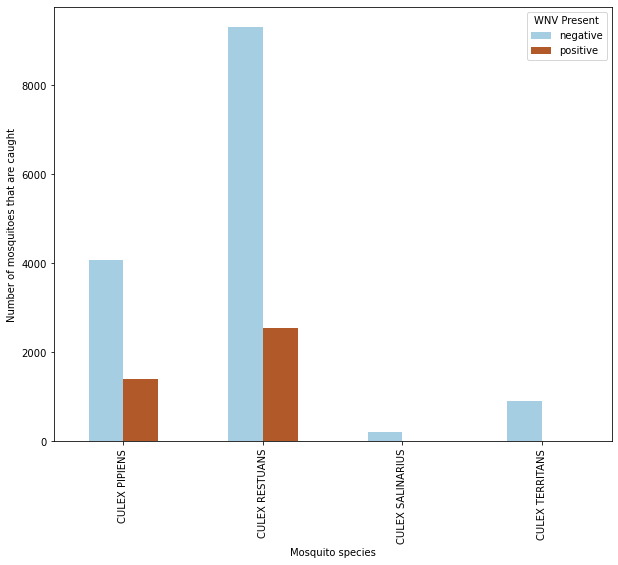

In [87]:
df.groupby(["Species"])["WNV Present"].value_counts().unstack().plot(kind='bar', colormap = 'Paired', figsize = (10,8))
plt.xlabel("Mosquito species")
plt.ylabel("Number of mosquitoes that are caught")
plt.show()

In [89]:
WNV_present['Percentage of positive cases'] = round((WNV_present['positive']/WNV_present['negative'])*100,2)
WNV_present

WNV Present,negative,positive,Percentage,Percentage of positive cases
Species,,,,
CULEX PIPIENS,4074,1412,34.66,34.66
CULEX RESTUANS,9309,2557,27.47,27.47
CULEX SALINARIUS,215,11,5.12,5.12
CULEX TERRITANS,903,14,1.55,1.55


From the visualisation it is clear to see that both CULEX PIPENS and CULEX RESTUANS were the two sub-species which had a high prevalence of WNV. 34.66% of PIPENS and 27.47% of RESTUANS were positive with WNV. From external research it is thought that PIPENS and RESTUANS are more resilient to weather conditions and have adapted to bite mammals this may be due to a host of reasons from weather conditions to geographical position.

The following visual explores the relationship between the number of mosquitos caught and trap type.

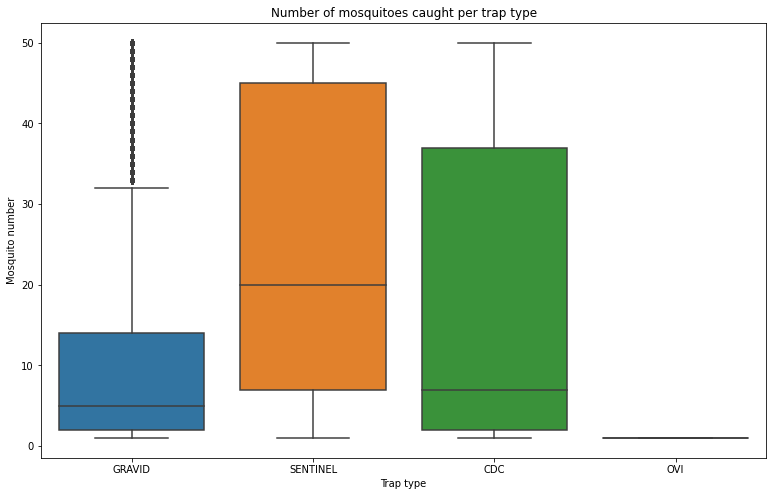

In [99]:
plt.figure(figsize = (13,8))
sns.boxplot(data = df, x='Trap type',y = 'Mosquito number')
plt.title("Number of mosquitoes caught per trap type")
plt.show()

From the data visualisation above, it is clear to see that Sentinel traps are the most robust. Followed by CDC, GRAVID and then OVI. 

From external research, the best way to reduce the number of mosquitos is to eliminate all sources of standing water that can support mosquito breeding, including water in bird baths, ponds, flowerpots, wading pools, old tires and any other receptacles. In communities where there are organized mosquito control programs, contact your municipal government to report areas of stagnant water in roadside ditches, flooded yards and similar locations that may produce mosquitoes. Furthermore, the Gravid Mosquito trap is a plastic washbasin, filled with a liquid attractant fondly called "Mosquito Soup". This takes advantage of the fact that mosquitos are attracted to stagnant water and it is demonstrated by the numbers. The CDC trap uses light to attract the mosquitos and captures them. Meanwhile, the sentinel trap uses an electric fan to to suck in the mosquitos into a pipe to capture them which seems to be more effective and the range of mosquitoes that are caught are much wider. Finally, OVI also adopts the use of liquid to attract mosquitos but it only attracts female mosquitos in an attempt to stop breeding. From the data it is clear to see that it doesn't do a very good a method of attracting mosquitos. With the data at hand, Gravid is the best method for attracting mosquitos and capturing them.

In [80]:
df.groupby('Trap').sum()['Mosquito number'].sort_values(ascending = False)

Trap
T002     9285
T008     6618
T138     5787
T115     4822
T114     4634
         ... 
T241        2
T078        2
T128A       2
T167        1
T040        1
Name: Mosquito number, Length: 190, dtype: int64

In [82]:
df['Trap'].str.len().value_counts()

4    17251
5      586
Name: Trap, dtype: int64

In [83]:
df['Trap'] = df['Trap'].apply(lambda x : x[:4] if len(x) >4 else x)

In [84]:
df['Trap'].str.len().value_counts()

4    17837
Name: Trap, dtype: int64

In [85]:
df['Trap'].str.isalpha().value_counts() #Sanity check to ensure that all the letters have been removed.

False    17837
Name: Trap, dtype: int64

In [87]:
df.groupby("Trap")["Mosquito number"].sum().sort_values()[-15:]

Trap
T912    3041
T225    3207
T128    3243
T066    3269
T913    3696
T028    4085
T151    4289
T011    4348
T009    4382
T030    4671
T115    4822
T114    4974
T008    6618
T138    8117
T002    9342
Name: Mosquito number, dtype: int64

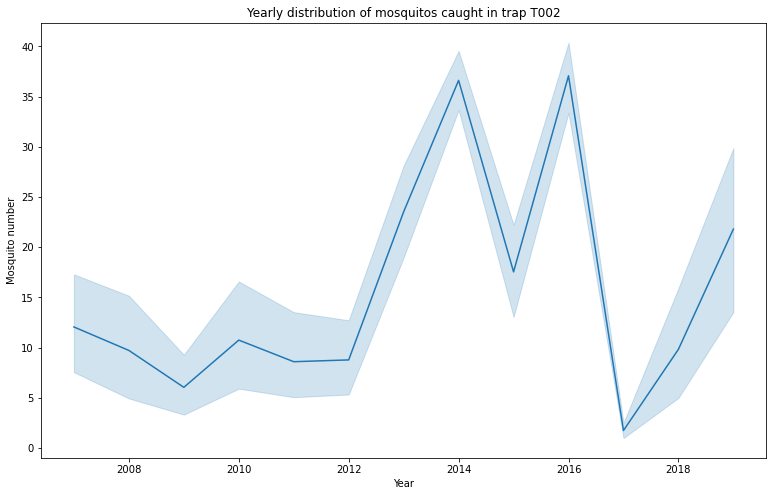

In [101]:
plt.figure(figsize = (13,8))
sns.lineplot(data= df[df['Trap'] == 'T002'], x="Year", y="Mosquito number")
plt.title('Yearly distribution of mosquitos caught in trap T002')
plt.show()

Due to the data inputted in the Trap regarding satellite traps, there were certain letters at the end of specific traps. This skewed the results when grouping by Trap. Therefore, I first had to filter through the Trap column to ensure that these were removed. Given that the letter increased the length of the string to 5 this was the method which I reduced them all to 4. I then filtered the data to find the trap with the highest number of mosquitos caught in it and plotted against the year. 

Trap T002 was the most efficient and upon further analysis of the location of the trap it was identified that it was quite inland. It was not as close to the coast as expected. However, due to the attraction mosquitos have to urban environments with it being humid and warm this explains why so many were caught in this area. Furthermore, the fact that this trap type was GRAVID and from the pie chart earlier demonstrating how successful GRAVID mosquito traps are, this contributed to the high number of mosquitos caught. 

The visualisation followed the trends of the total number of mosquitos caught reachiing highs in 2014 and 2016 as expected. Although 2016 experienced higher temperatures than 2014 the trap still caught the same amount of mosquitos, demonstrating that in that certain Address block there wasn't a significant change in mosquito numbers even though it was an urban environment. However, this does compund the fact that mosquitos like warm conditions as the rise in the number caught correlates with the high temperatures of 2014 and 2016. 

## Conclusion

To conlude, mosquitoes are more likely to bite when the weather is warm and sunny. This is because they like to breed in warm, humid areas. Mosquitoes are cold-blooded insects. They prefer to live in areas that are around 70-80 degrees fahrenheit. This is demonstrated by the bar chart visualisation the mosquito numbers for each month. Although it has been recorded that July is the hottest month of the year and the temperature is perfect for mosquitos the conditions are not right for mosquitos as they appreciate humidity as well. This is why there were a larger number of mosquitos caught in August as the humidity levels were perfect for mosquitos. Through external research, the pipens sub species of the Culex family is the biggest carrier of WNV, with 34.66% of the mosquitos caught testing positive. It is clear from the pie chart about the trap type that mosquitos are heavily attracted to water. With Chicago being so close to the water this explains the prevalence of WNV in the area, but reducing water ditches and areas of stagnant water will help to reduce the spread of the disease. Furthermore, increasing awareness about the disease in the summer months will help to stop the spread of the disease. Encouraging the use of insect repellent and usage of mosquito nets are necessary procedures to stop the spread.

Finally, when analysing the data there multiple indentical rows with the only differing value being the Latitude and Longitude data. Initially I thought this contributed to the duplicate rows values, however, upon further analysis it was determined that traps were set in the same block area as the only differing value was the coordinates. 

## Next Steps

The next steps for this project are to start conducting some machine learning models to the data. I have conducted the preliminary steps of wrangling the data and visualising it. 